# RESOLUÇÃO TESTE 3A

In [2]:
#bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## QUESTÃO 01

In [16]:
df = pd.read_csv('diabetes.csv')
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [18]:
linhas, colunas = df.shape

print(f'linhas: {linhas}')
print(f'colunas: {colunas}')

linhas: 768
colunas: 9


In [26]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## QUESTÃO 02

In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## QUESTÃO 03

In [29]:
mapeamento_diabetes = {0: 'Não', 1: 'Sim'}
df['diabetes_mapa'] = pd.Categorical(df['Outcome']).map(mapeamento_diabetes)

df[['Outcome','diabetes_mapa']].head(5)

C:\Users\carol\AppData\Local\Temp\ipykernel_11300\1066057362.py:2: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  df['diabetes_mapa'] = pd.Categorical(df['Outcome']).map(mapeamento_diabetes)


,Outcome,diabetes_mapa
0,1,Sim
1,0,Não
2,1,Sim
3,0,Não
4,1,Sim


## QUESTÃO 04

C:\Users\carol\AppData\Local\Temp\ipykernel_11300\1635309710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes_mapa', data=df, palette={'green', 'red'})


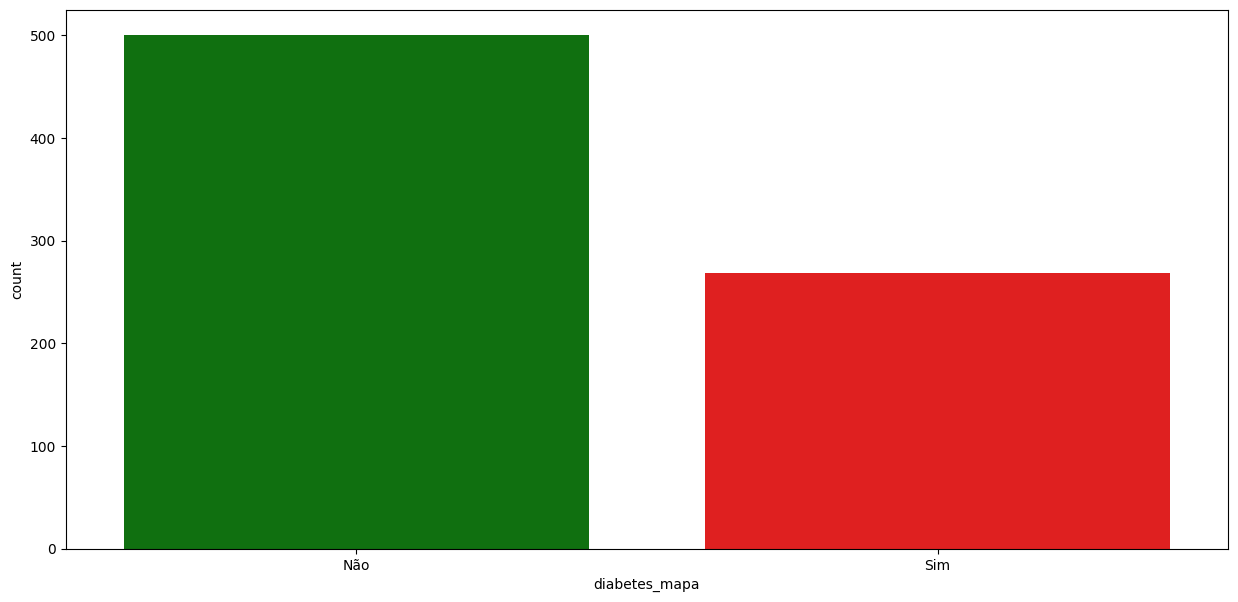

In [42]:
plt.figure(figsize=(15, 7)) 

sns.countplot(x='diabetes_mapa', data=df, palette={'green', 'red'})
plt.show()

## QUESTÃO 05

In [45]:
cols_selecionadas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_selecionadas] = df[cols_selecionadas].replace(0, df[cols_selecionadas].median())

df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,30.5,33.6
1,85,66,29,30.5,26.6
2,183,64,23,30.5,23.3
3,89,66,23,94.0,28.1
4,137,40,35,168.0,43.1


## QUESTÃO 06

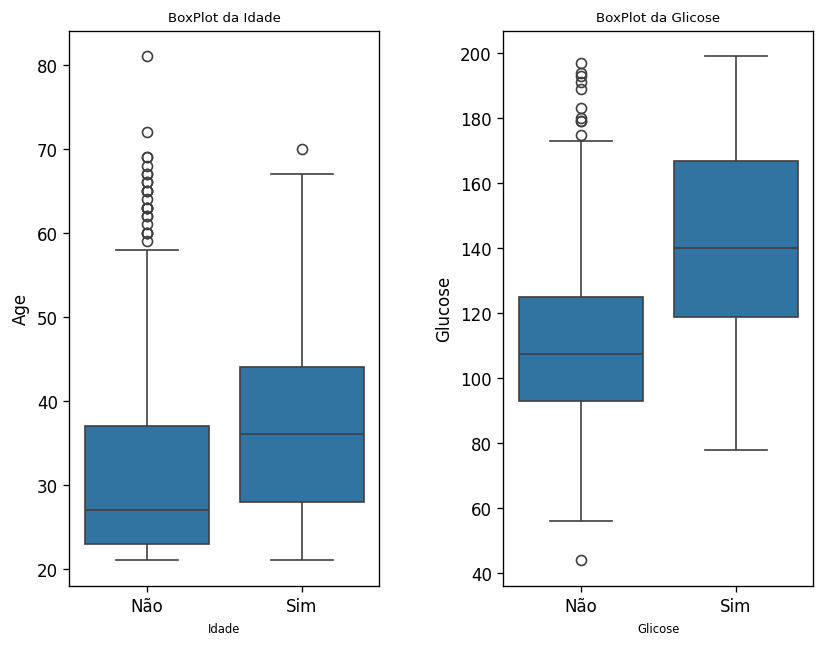

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(8, 6), gridspec_kw={'hspace': 0.4, 'wspace': 0.4})

# Boxplot da Idade
sns.boxplot(x='diabetes_mapa', y='Age', data=df, ax=ax[0])
ax[0].set_title('BoxPlot da Idade', fontdict={'fontsize': 8})
ax[0].set_xlabel('Idade', fontdict={'fontsize': 7})

# Boxplot da Glicose
sns.boxplot(x='diabetes_mapa', y='Glucose', data=df, ax=ax[1])
ax[1].set_title('BoxPlot da Glicose', fontdict={'fontsize': 8})
ax[1].set_xlabel('Glicose', fontdict={'fontsize': 7})

plt.show()


## QUESTÃO 07

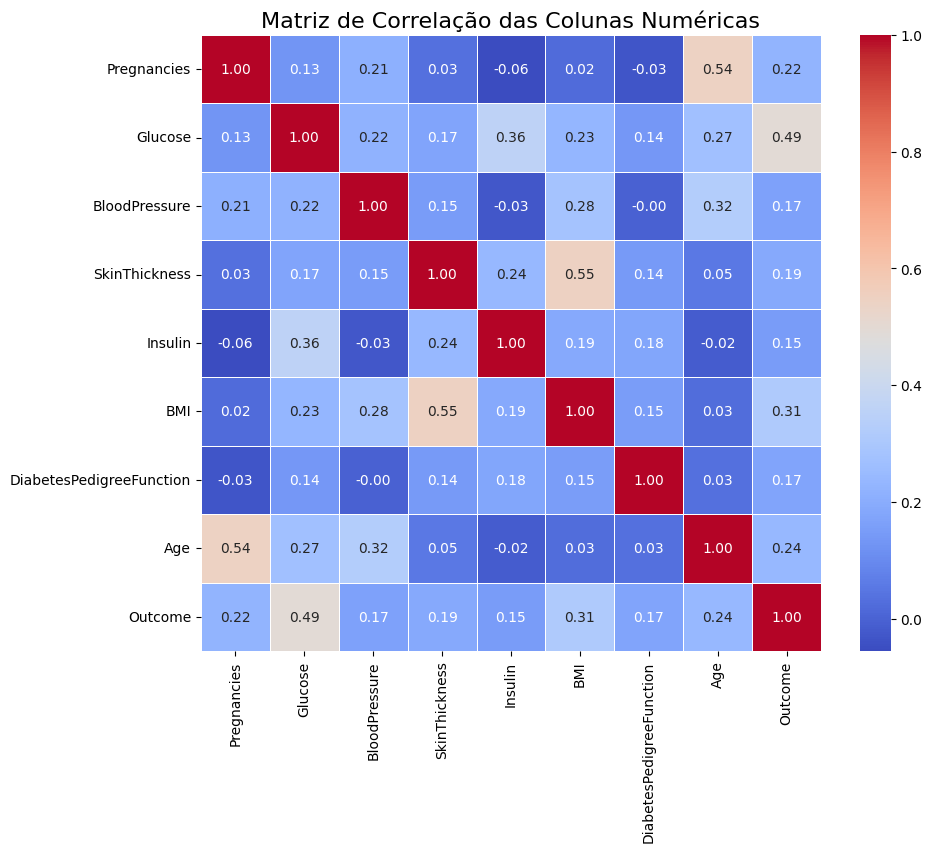

In [66]:
colunas_numericas = df.select_dtypes(include=['number'])

correlacao = colunas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação das Colunas Numéricas', fontsize=16)
plt.show()

In [ ]:
Crie um novo dataframe só com as colunas Pregnancies e Age e apresente o número de gravidezes
médias de mulheres com idades entre 20 e 30 anos e de mulheres com idades entre 40 e 50 anos.

## QUESTÃO 08

In [71]:
df2 = df[['Pregnancies', 'Age']]
df2.head()

,Pregnancies,Age
0,6,50
1,1,31
2,8,32
3,1,21
4,0,33


In [90]:
df2.query('20<Age<30').mean()

Pregnancies     1.921717
Age            24.313131
dtype: float64

In [91]:
df2.query('40<Age<50').mean()

Pregnancies     7.152381
Age            43.895238
dtype: float64

## QUESTÃO 09

In [101]:
import sqlite3

In [102]:
df_sql = sqlite3.connect('df.sqlite')

In [98]:
mais_60 = df.query('Age > 60')

In [105]:
conn = sqlite3.connect('mais_60.db')
mais_60.to_sql('gravida_60plus_table', conn, index=False, if_exists='replace')

consulta_sql = 'SELECT Age FROM gravida_60plus_table ORDER BY Age'

idade_ordenada_df = pd.read_sql_query(consulta_sql, conn)

print(idade_ordenada_df)

conn.close()

     Age
0     21
1     21
2     21
3     21
4     21
..   ...
731   58
732   58
733   59
734   59
735   59

[736 rows x 1 columns]
